# 군집(Clustering)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

try:
    import mglearn
except ModuleNotFoundError as e:
    import sys
    !{sys.executable} -m pip install mglearn
    import mglearn
    


## K-Means Clustering

### sklearn의 KMeans

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 데이터 생성
X, y = make_blobs(random_state=1)
X, y

# Clustering Model
model = KMeans(init='k-means++', n_clusters=3) # default init = 'k-means++'  # 가장 많이 떨어뜨림
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# modeld의 실제 label, model의 예측 label
model.labels_, model.predict(X)

(array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
        1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
        2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
        0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
        2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32),
 array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
        1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
        2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
        0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
        2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32))

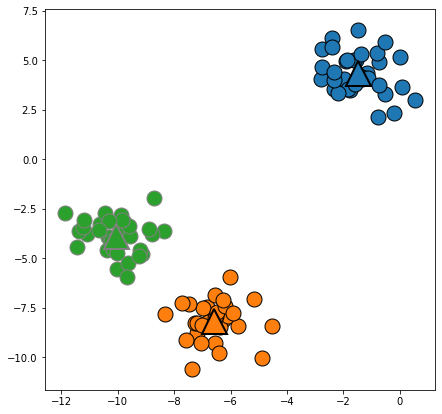

In [68]:
plt.figure(figsize=(7,7))
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o', s=15)
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], 
    markers = '^', markeredgewidth=2, s=25
)
plt.show()

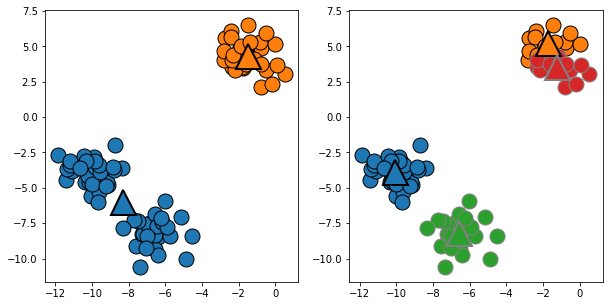

In [76]:
# 클러스터 수 2, 클러스터 수 4
fig, axes = plt.subplots(1,2, figsize=(10,5))

model = KMeans(n_clusters=2)
model.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o', s=15, ax=axes[0])
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1], 
    markers = '^', markeredgewidth=2, s=25, ax=axes[0]
)


model = KMeans(n_clusters=4)
model.fit(X)


mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o', s=15, ax=axes[1])
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2, 3], 
    markers = '^', markeredgewidth=2, s=25, ax=axes[1]
)
plt.show()

### K-Means 실패하는 경우.
#### 밀도(분산(Standard Variation))의 정도의 차이에 따라 

In [94]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1, 2.5, 0.5],
                                random_state = 170)

model = KMeans(n_clusters=3, random_state=0).fit(X)
y_pred = model.predict(X_varied)
y_pred[:5], y_varied[:5]

(array([0, 1, 0, 1, 1], dtype=int32), array([0, 1, 1, 2, 2]))

Text(0, 0.5, 'Feature 2')

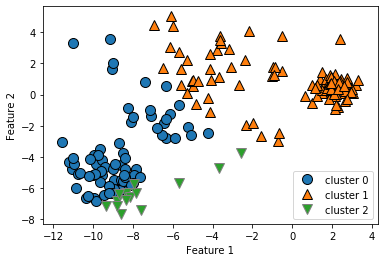

In [95]:
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", 'cluster 1', 'cluster 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### 복잡한 모델 (선형적인 모델)

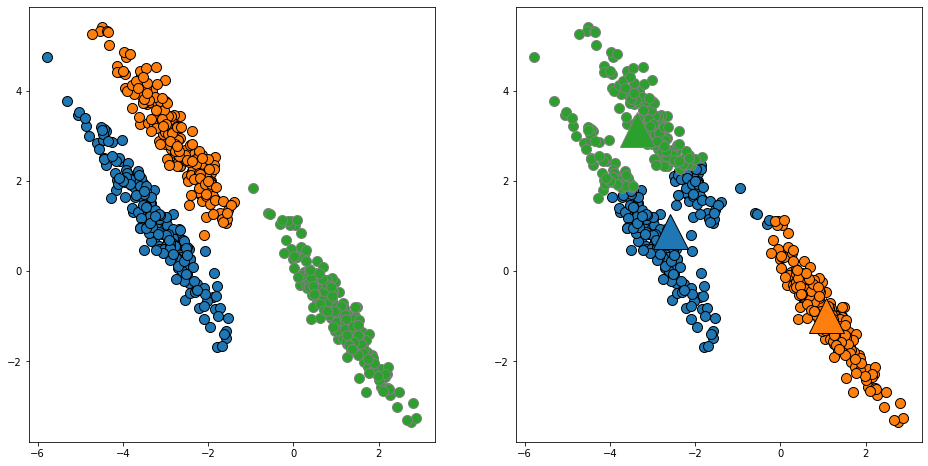

In [106]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

model = KMeans(n_clusters=3)
model.fit(X)

y_pred = model.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, markers='o', ax=axes[0])

mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o', ax=axes[1])
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], markers='^', ax=axes[1], s=35)
plt.show()

### 더 복잡한 모델 (반달형)

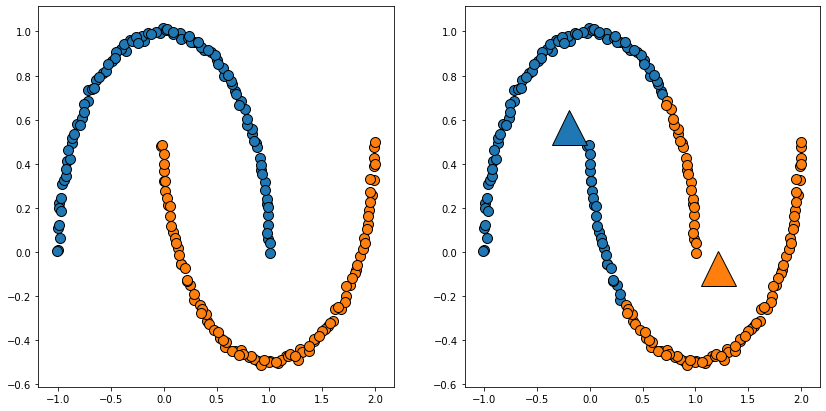

In [110]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.01, random_state=0)

model = KMeans(n_clusters=2)
model.fit(X)
y_pred = model.predict(X)


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, markers='o', ax=axes[0])

mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o', ax=axes[1])
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1], markers='^', ax=axes[1], s=35)
plt.show()

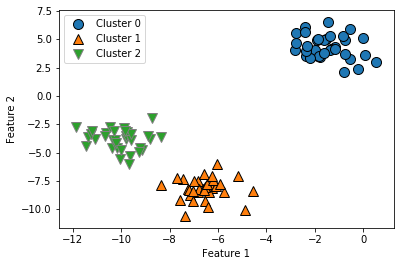

In [131]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

model = AgglomerativeClustering(n_clusters=3)
assignment = model.fit_predict(X)


mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='best')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Dendrogram

Text(0, 0.5, 'distance of cluster')

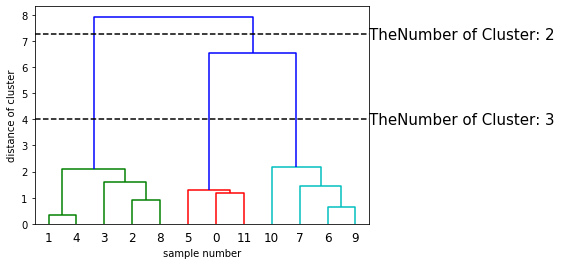

In [143]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete
X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, "TheNumber of Cluster: 2", va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, "TheNumber of Cluster: 3", va='center', fontdict={'size': 15})

plt.xlabel("sample number")
plt.ylabel("distance of cluster")

## PCA

In [ ]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split

try:
    import mglearn
except ModuleNotFoundError as e:
    import sys
    !{sys.executable} -m pip install mglearn
    import mglearn

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### PCA를 적용해 유방암 데이터셋 시각화하기

##### PCA의 목적1. 고차원 데이터셋의 시각화.

In [ ]:
cancer = load_breast_cancer()
cancer.keys()

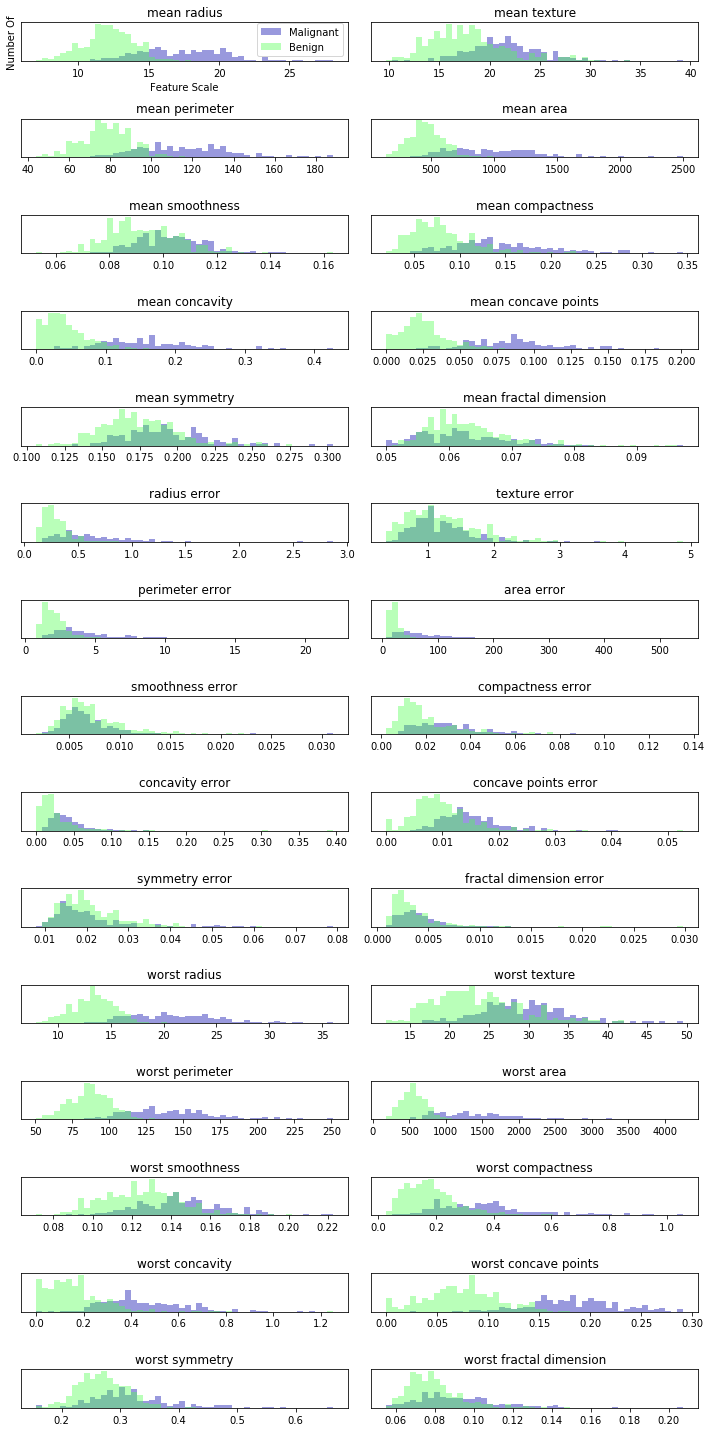

In [39]:
# 히스토그램 그리기
fig, axes = plt.subplots(15,2, figsize=(10, 20))
# fig = figure ==> 그림 그릴 영역(도화지), # axes = ax ==> 쪼개진 각 plot에 대한 정보.

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() 
# <nd_array>.ravel(): Return a contiguous flattened array.

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.4)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks([])

ax[0].set_xlabel('Feature Scale')
ax[0].set_ylabel("Number Of")
ax[0].legend(['Malignant', 'Benign'], loc='best')
fig.tight_layout()

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
X_scaled[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [67]:
# PCA 변환 학습 및 적용.
# 1. PCA 객체 생성
# 2. 주성분 찾기
# 3. 데이터 회전 및 차원 축소

### PCA 변환 하기(Sklearn 사용X)

In [348]:
# X_scaled (표준화된 X)
#### [순서] ####
# 1. 공분산 행렬(covariance Matrix) 만들기
# 2. 공분산 행렬의 Eigen Value와 Eigen Vector 확인하기
# 3. Eigen Value가 높은 것 -> 주성분으로 설정하기
# 4. 주성분에 projection하기
# 5. 주성분 산점도 그리기
X_scaled.shape

(569, 30)

In [349]:
# 1. 공분산 행렬 만들기
# np.cov(m, **kwargs) ==> m: 행렬(행: 변수, 열: 관측치)
X_scaled_T = X_scaled.T
print('X_scaled_T shape: ', X_scaled_T.shape)
cov_matrix = np.cov(X_scaled_T)

# 공분산 행렬 (Covariance Matrix)
print('공분산행렬 Shape: ', cov_matrix.shape)
# 각 항(0,0), (1,1), (2,2)들이 1
cov_matrix[0], cov_matrix[1], cov_matrix[2]

X_scaled_T shape:  (30, 569)
공분산행렬 Shape:  (30, 30)


(array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
         0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
         0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
         0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
         0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
         0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833]),
 array([ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969,
         0.23711895,  0.30295025,  0.29398071,  0.07152669, -0.07657176,
         0.27635436,  0.38703783,  0.28216902,  0.26030246,  0.00662542,
         0.19231259,  0.14354535,  0.1641395 ,  0.00914324,  0.0545534 ,
         0.35319367,  0.9136503 ,  0.35866993,  0.34415078,  0.07763981,
         0.27831873,  0.3015552 ,  0.29583577,  0.10519278,  0.11941522]),
 array([ 0.99961207,  0.33011322,  1.00176056,  0.98824361,  0.20764309,
         0.55791673,  0.71739645,  0.85247524, 

In [350]:
# 2. 공분산 행렬의 Eigen Value와 Eigen Vector 확인하기
# numpy.linalg.eig(a)
eigvalue, eigvector = np.linalg.eig(cov_matrix)
print('eigvector Shape: ', eigvector.shape)
# eigvector 확인하기
# 0과 0사이
eigvalue[0], eigvector.T[0], eigvalue[1], eigvector.T[1]

eigvector Shape:  (30, 30)


(13.304990794374561,
 array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
        0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
        0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
        0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
        0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
        0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394]),
 5.701374603726145,
 array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]))

In [351]:
# 3. Eigen Value가 높은 것 -> 주성분으로 설정하기
# eigvalue 는 이미 정렬 되어 있음.
PC1, PC2 = eigvector.T[0], eigvector.T[1]
print("PC1 정보량: ",eigvalue[0]/ eigvalue.sum())
print("PC2 정보량: ",eigvalue[1]/ eigvalue.sum())

PC1 정보량:  0.4427202560752635
PC2 정보량:  0.18971182044033094


In [352]:
# 4. 주성분에 Projection 하기
X_scaled.shape, PC1.shape, PC2.shape
PC1_X = X_scaled.dot(PC1)
PC2_X = X_scaled.dot(PC2)

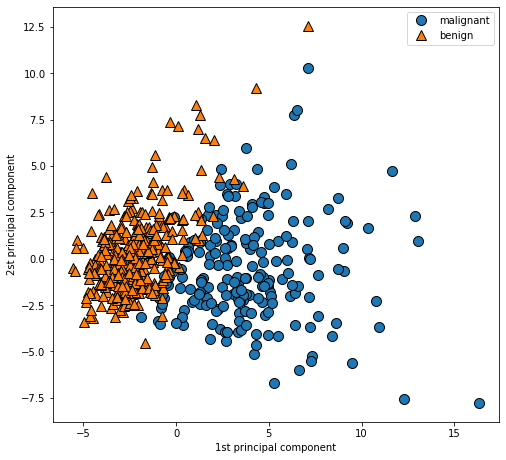

In [353]:
# 5. 시각화
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(PC1_X, PC2_X, cancer.target)
plt.legend(["malignant", 'benign'])
plt.gca().set_aspect('equal') # gca() --> SubplotAxes(축) 반환
plt.xlabel("1st principal component")
plt.ylabel("2st principal component")
plt.show()

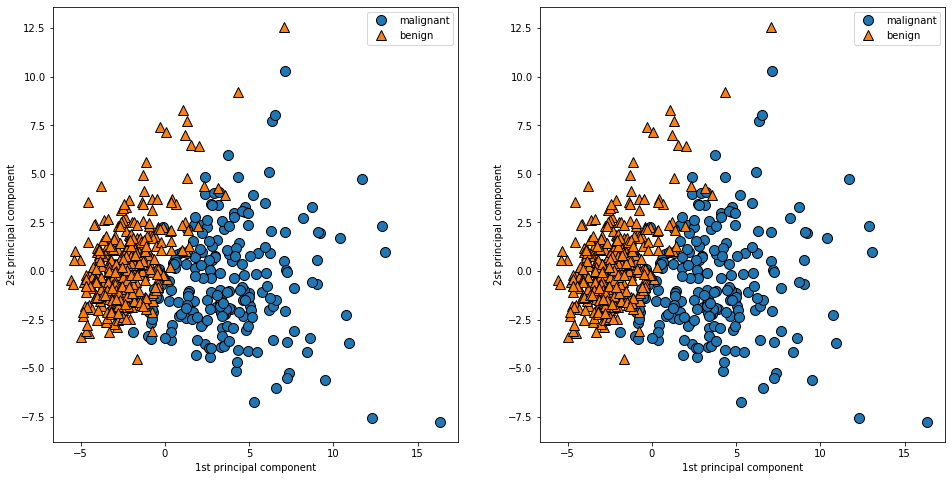

In [354]:
# 6. 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Sklearn
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target, ax=axes[0])
axes[0].legend(["malignant", 'benign'])
axes[0].set_xlabel("1st principal component")
axes[0].set_ylabel("2st principal component")

# Eigen
mglearn.discrete_scatter(PC1_X, PC2_X,  cancer.target, ax=axes[1])
axes[1].legend(["malignant", 'benign'])
axes[1].set_xlabel("1st principal component")
axes[1].set_ylabel("2st principal component")
plt.show()


In [356]:
# sklearn PCA와 비교.
# 2개 주성분
print("Sklearn PCA_Component: ", pca.components_, sep='\n')
print()
print("Eigen Vector: ", np.array([PC1,PC2]), sep="\n")

Sklearn PCA_Component: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]

Eigen Vector: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.18341

In [ ]:
# 6. 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Sklearn
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target, ax=axes[0])
axes[0].legend(["malignant", 'benign'])
axes[0].set_xlabel("1st principal component")
axes[0].set_ylabel("2st principal component")

# Eigen
mglearn.discrete_scatter(PC1_X, PC2_X,  cancer.target, ax=axes[1])
axes[1].legend(["malignant", 'benign'])
axes[1].set_xlabel("1st principal component")
axes[1].set_ylabel("2st principal component")
plt.show()


# sklearn PCA와 비교.
# 2개 주성분
print("Sklearn PCA_Component: ", pca.components_, sep='\n')
print()
print("Eigen Vector: ", np.array([PC1,PC2]), sep="\n")

### Sklearn에서 PCA 변환 하기

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # PCA 모델 만들기, (주성분 두 개 찾기)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: ", str(X_scaled.shape))
print("축소된 데이터 형태: ", str(X_pca.shape))
print("PCA Component: ", pca.components_, sep='\n')

원본 데이터 형태:  (569, 30)
축소된 데이터 형태:  (569, 2)
PCA Component: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


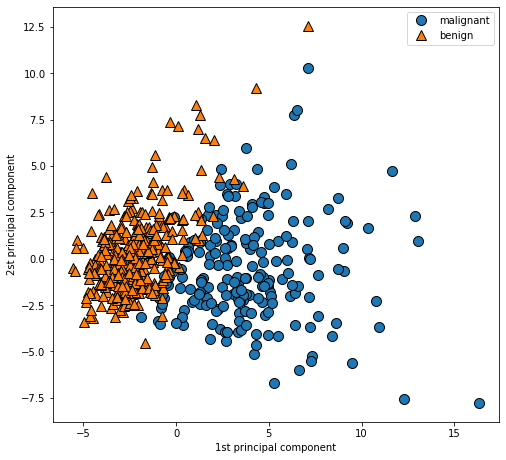

In [92]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", 'benign'])
plt.gca().set_aspect('equal') # gca() --> SubplotAxes(축) 반환
plt.xlabel("1st principal component")
plt.ylabel("2st principal component")
plt.show()

PCA Component: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Component')

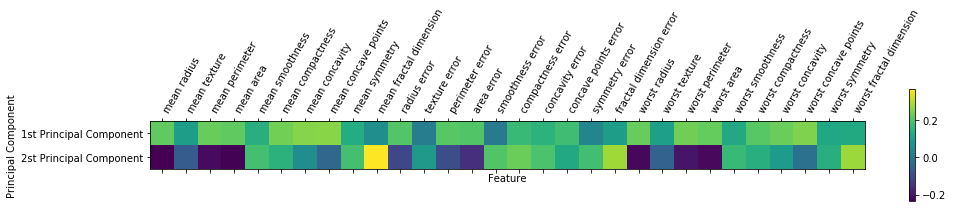

In [93]:
print("PCA Component: ", pca.components_, sep='\n')
plt.matshow(pca.components_, cmap='viridis') # matrix show
plt.yticks([0,1], ["1st Principal Component", "2st Principal Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Component")

In [ ]:
### Sklearn에서 PCA 변환 하기

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # PCA 모델 만들기, (주성분 두 개 찾기)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: ", str(X_scaled.shape))
print("축소된 데이터 형태: ", str(X_pca.shape))
print("PCA Component: ", pca.components_, sep='\n')

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", 'benign'])
plt.gca().set_aspect('equal') # gca() --> SubplotAxes(축) 반환
plt.xlabel("1st principal component")
plt.ylabel("2st principal component")
plt.show()

print("PCA Component: ", pca.components_, sep='\n')
plt.matshow(pca.components_, cmap='viridis') # matrix show
plt.yticks([0,1], ["1st Principal Component", "2st Principal Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Component")